# 모듈 불러오기

#### 기본

In [ ]:
import numpy as np
import pandas as pd
import joblib

In [ ]:
# !conda install numpy 
# !conda install pandas
# !conda install scikit-learn
# !conda install scipy
# !conda install tensorflow
# !conda install matplotlib
# !conda install seaborn
# !pip install ydata-profiling

# !pip install xgboost
# !pip install lightgbm
# !pip install catboost
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension
# !pip install hyperopt
# !pip install -U imbalanced-learn
# !pip install missingno
# !pip install shap

#### 전처리

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn import impute
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer

#### 리샘플링

In [ ]:
from imblearn.over_sampling import (
    RandomOverSampler, 
    ADASYN, 
    SMOTE
)
from imblearn.under_sampling import (
    RandomUnderSampler, 
    TomekLinks, 
    CondensedNearestNeighbour, 
    OneSidedSelection, 
    EditedNearestNeighbours, 
    NeighbourhoodCleaningRule
)

#### 분석

In [ ]:
from scipy.stats import skew, kurtosis
from scipy.stats import ttest_ind, f_oneway, pearsonr, chi2_contingency
from ydata_profiling import ProfileReport

#### 회귀

In [ ]:
from sklearn.linear_model import LinearRegression as RL
from sklearn.neighbors import KNeighborsRegressor as KNNR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR
from xgboost import XGBRegressor as XGBR
from lightgbm import LGBMRegressor as LGBMR
from catboost import CatBoostRegressor as CBR

from lightgbm import plot_importance as lgbm_plot_importance
from xgboost import plot_importance as xgb_plot_importance
from catboost import Pool

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

#### 분류

In [ ]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNNC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from xgboost import XGBClassifier as XGBC
from lightgbm import LGBMClassifier as LGBMC
from catboost import CatBoostClassifier as CBC

from sklearn.metrics import confusion_matrix as cmatrix
from sklearn.metrics import classification_report as creport
from sklearn.metrics import recall_score as recall
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

#### 교차검증

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from catboost import cv
import hyperopt

from sklearn.model_selection import (
    StratifiedKFold, # 분류
    KFold, # 회귀
    # GroupKFold, 
    # RepeatedKFold, 
    # StratifiedGroupKFold, 
    # RepeatedStratifiedKFold
)

#### 비즈니스 이해

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay, partial_dependence

#### 시각화

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')  

import warnings
warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

tf.compat.v1.disable_v2_behavior() # shap 그래프 tf1 버전 지원 tf2 비활성화
import shap

# AI 모델링 선택

# 데이터 로드

In [10]:
folder_path = '../분류데이터'

x_train = pd.read_csv(f'{folder_path}/x_train.csv', sep=',', encoding='utf-8')
y_train = pd.read_csv(f'{folder_path}/y_train.csv', sep=',', encoding='utf-8')
x_test = pd.read_csv(f'{folder_path}/x_test.csv', sep=',', encoding='utf-8')
y_test = pd.read_csv(f'{folder_path}/y_test.csv', sep=',', encoding='utf-8')

# 회귀 모델링 선택

In [33]:
models =    {
                'RL': RL(n_jobs=-1),
                'KNNR': KNNR(n_neighbors=5),
                'DTR': DTR(max_depth=5, random_state=1),
                'SVR': SVR(kernel='rbf', C=1),
                'RFR': RFR(max_depth=5, random_state=1),
                'LGBMR': LGBMR(max_depth=5, num_leaves=31, learning_rate=0.1),
                'CBR': CBR(iterations=100, cat_features=np.where(x_train.dtypes != np.float)[0], random_state=1)
            }

results = {}
r2_scores = {}

for key in models:
    model = models[key]
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    mse_result = mse(y_test, y_pred)
    r2_result = r2_score(y_test, y_pred)
    r2_scores[key] = r2_result
    
    print('=' * 20, key, '=' * 20)
    print('mse : ', mse_result)
    print('r2_score : ', r2_result)
    
    results[key] = model

==================== RL ====================
mse :  0.24332232977611687
r2_score :  0.022392579467794493
==================== KNNR ====================
mse :  0.10442040185471407
r2_score :  0.5804653037719552
==================== DTR ====================
mse :  0.0906302452854706
r2_score :  0.635870656025477
==================== SVR ====================
mse :  0.10877419127782056
r2_score :  0.5629728818829334
==================== RFR ====================
mse :  0.07184216480566134
r2_score :  0.711356399202101
==================== LGBMR ====================
mse :  0.04585018314745891
r2_score :  0.8157855905828331
Learning rate set to 0.309259
0:	learn: 0.4128566	total: 2.43ms	remaining: 241ms
1:	learn: 0.3451176	total: 4.37ms	remaining: 214ms
2:	learn: 0.3079455	total: 6.18ms	remaining: 200ms
3:	learn: 0.2805463	total: 8.28ms	remaining: 199ms
4:	learn: 0.2634203	total: 10.3ms	remaining: 197ms
5:	learn: 0.2514596	total: 12.3ms	remaining: 192ms
6:	learn: 0.2406395	total: 15.7ms	remai

#### 모델 1개씩 변수 중요도 시각화

In [ ]:
key = 'LGBMC'
tmp = pd.DataFrame({'feature_importance': results[key].feature_importances_, 'feature_names': list(x_train)}).sort_values('feature_importance', ascending=False)

plt.figure(figsize=(16, 6))
sns.barplot(x='feature_importance', y='feature_names', data = tmp)
plt.title(key)
plt.show()

#### 모델 여러개 변수 중요도 시각화

In [ ]:
for key in results:
    if key in ['RL', 'KNNR', 'SVR']:
        continue
    tmp = pd.DataFrame({'feature_importance': results[key].feature_importances_, 'feature_names': list(x_train)}).sort_values('feature_importance', ascending=False)[:20]
    plt.figure(figsize=(16, 6))
    sns.barplot(x='feature_importance', y='feature_names', data = tmp)
    plt.title(key)
    plt.show()

#### 모델별 r2_scores

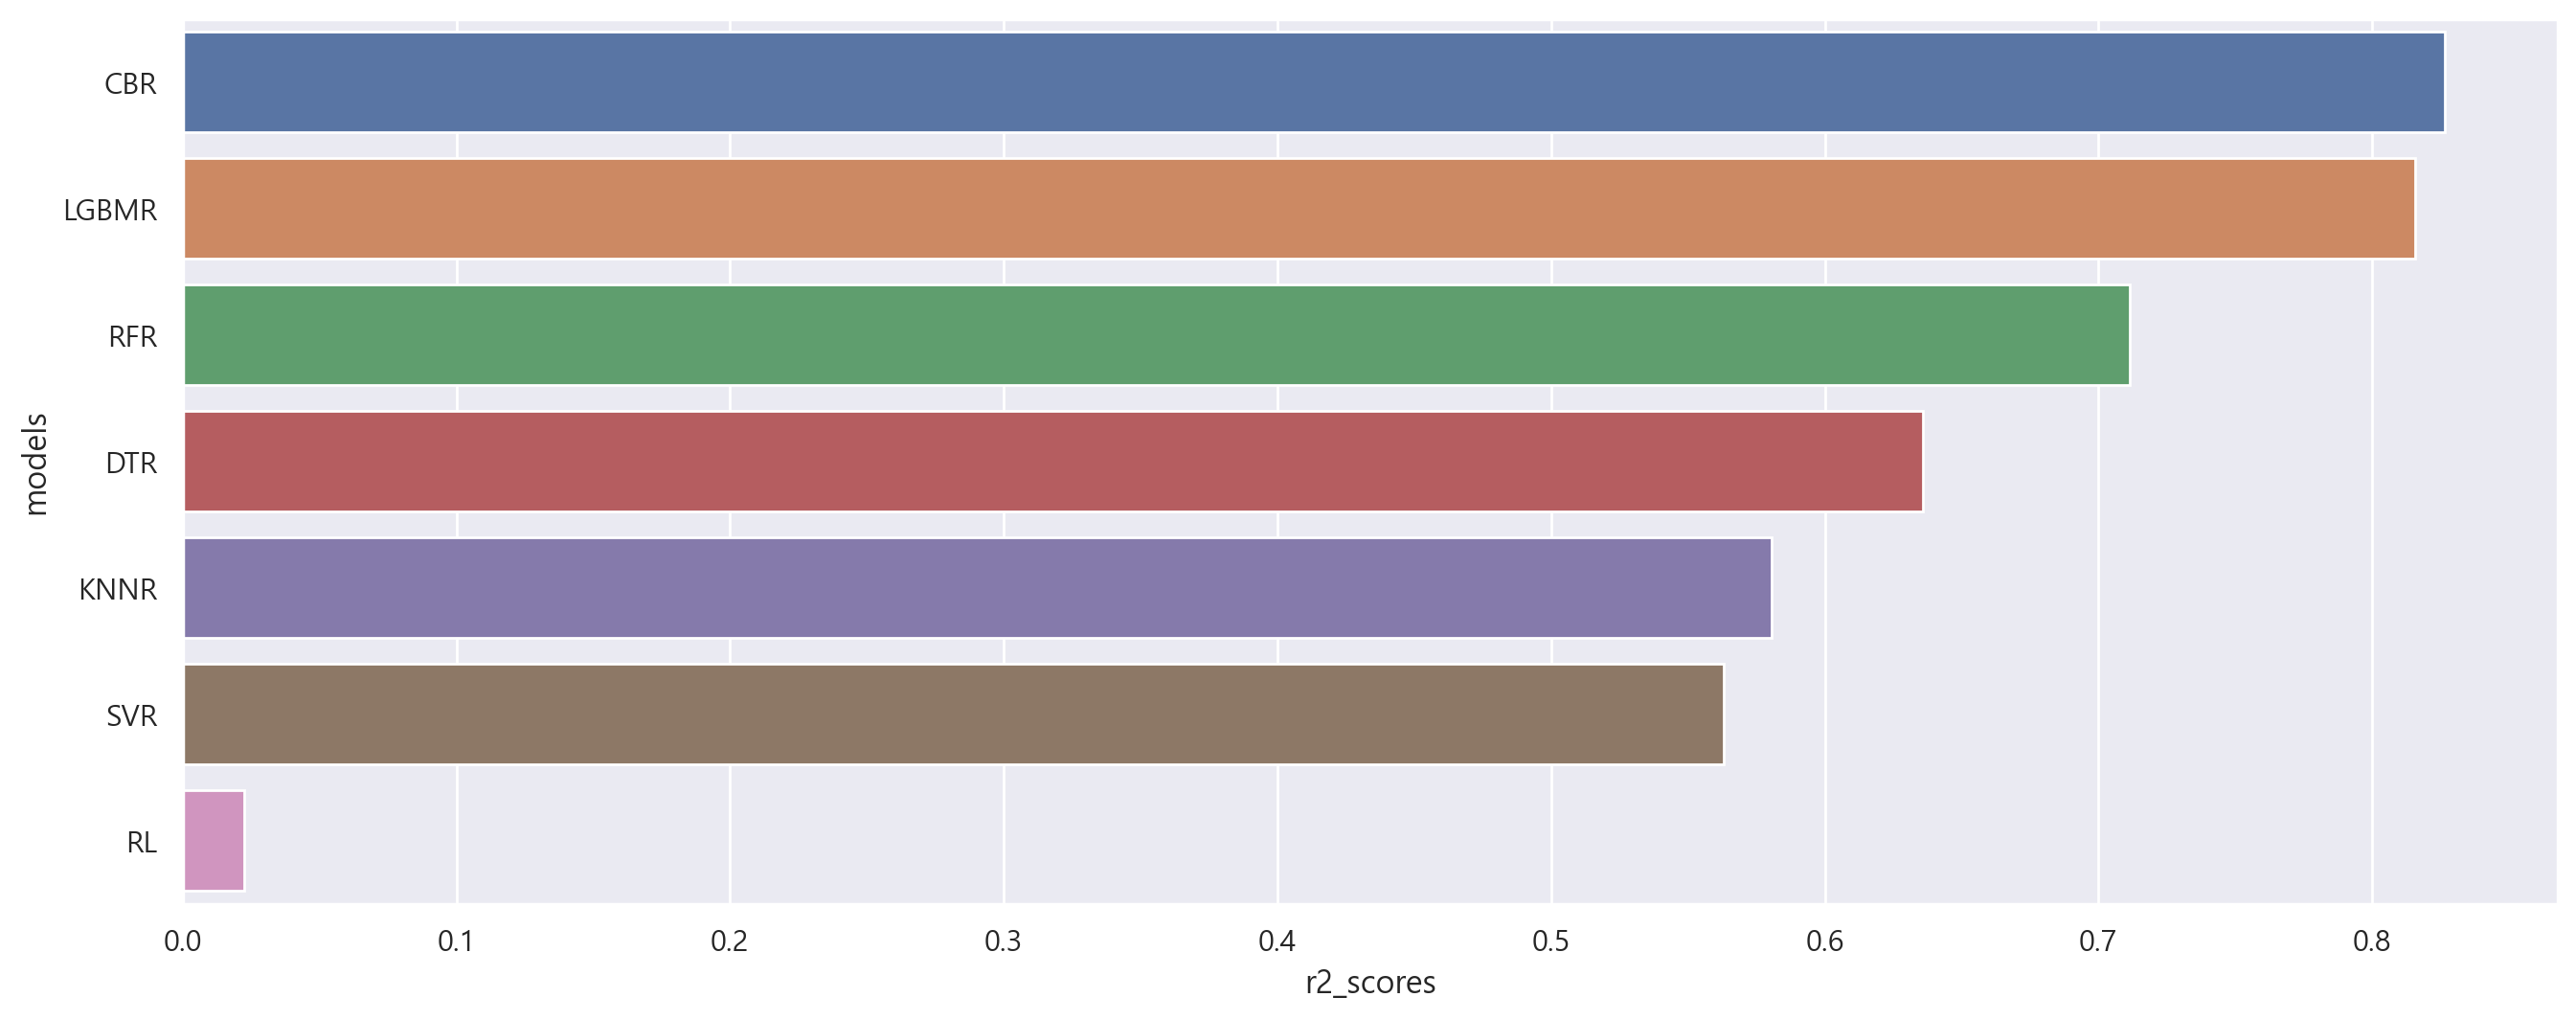

In [58]:
# 시각화
tmp = pd.DataFrame({'r2_scores': r2_scores.values(), 'models': list(r2_scores)}).sort_values('r2_scores', ascending=False)

plt.figure(figsize=(16, 6))
sns.barplot(x='r2_scores', y='models', data = tmp)
plt.show()

# 분류 모델링 선택

In [53]:
models = {
        'LR': LR(C=1, random_state=1, n_jobs=-1),
        'KNN': KNNC(n_neighbors=5, n_jobs=-1),
        'DTC': DTC(max_depth=5, random_state=1),
        'SVC': SVC(kernel='rbf', C=1),
        'RFC': RFC(n_estimators=10, max_depth=5, random_state=1),
        'LGBMC': LGBMC(max_depth=5, num_leaves=31, learning_rate=0.1, random_state=1),
        'CBC': CBC(iterations=100, cat_features=np.where(x_train.dtypes != np.float)[0], verbose=False, random_state=1)
        }

results = {}
acc_results = {}
recall_results = {}
y_preds = {}

for key in models:
    model = models[key]
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    results[key] = model
    y_preds[key] = y_pred
    acc_results[key] = acc(y_test, y_pred)
    recall_results[key] = recall(y_test, y_pred)

In [54]:
#'LR', 'KNN', 'DTC', 'SVC', 'RFC', 'LGBMC', 'CBC', 
key = 'CBC' # 입력해서 검색

print('=' * 20, key, '=' * 20)
print('confusion_matrix\n', cmatrix(y_test, y_preds[key]))
print('classification_report\n', creport(y_test, y_preds[key]))
print('=' * 60)

==================== CBC ====================
confusion_matrix
 [[289  13]
 [ 22 323]]
classification_report
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       302
           1       0.96      0.94      0.95       345

    accuracy                           0.95       647
   macro avg       0.95      0.95      0.95       647
weighted avg       0.95      0.95      0.95       647



# 시각화

#### 모델별 Accuracy 시각화

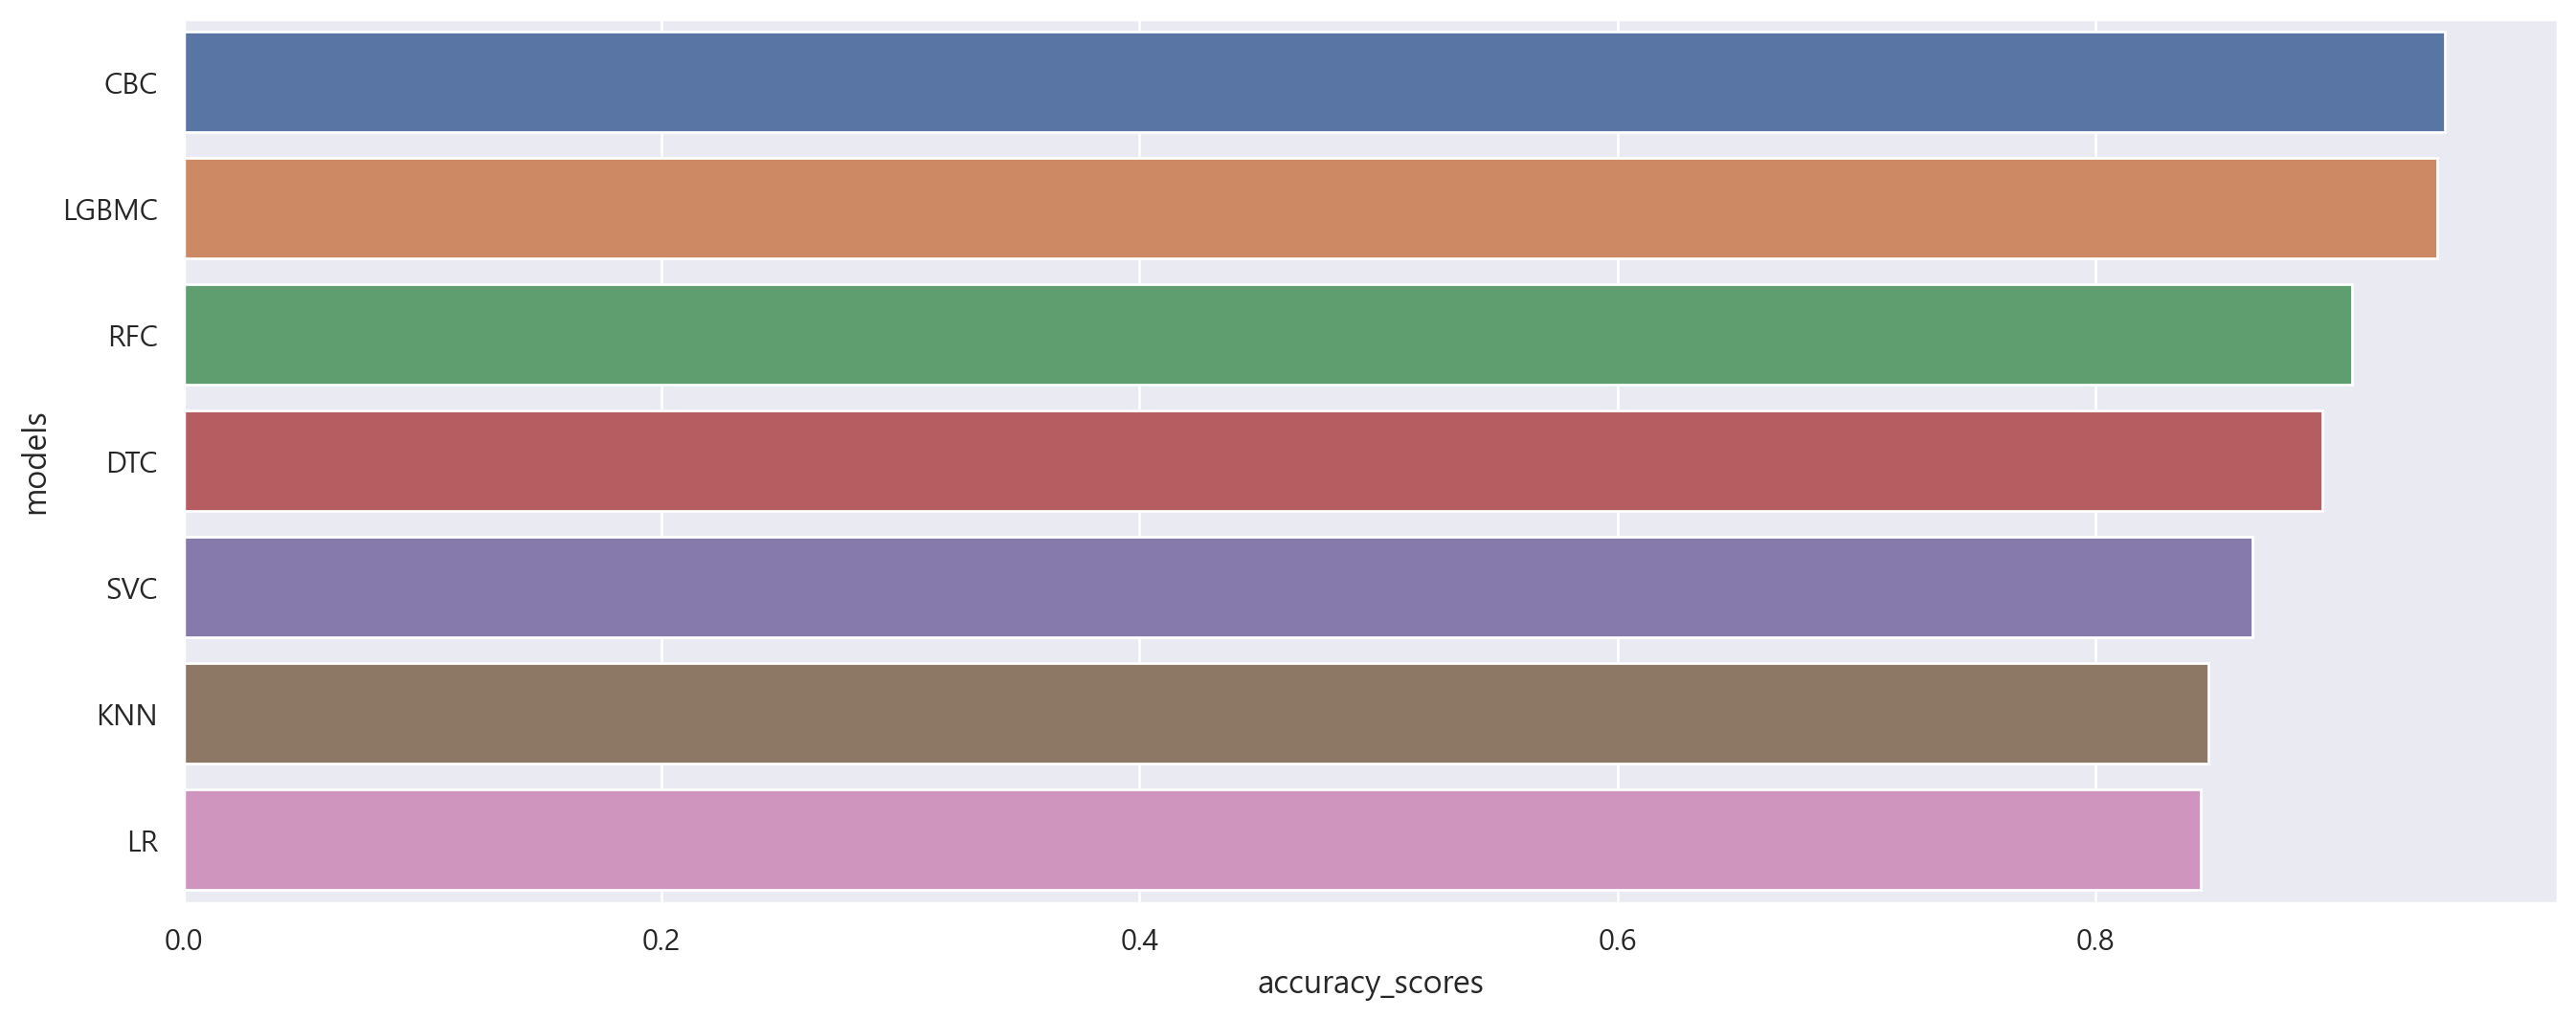

In [63]:
tmp = pd.DataFrame({'accuracy_scores': acc_results.values(), 'models': list(acc_results)}).sort_values('accuracy_scores', ascending=False)

plt.figure(figsize=(16, 6))
sns.barplot(x='accuracy_scores', y='models', data = tmp)
plt.show()

#### 모델별 Recall 시각화

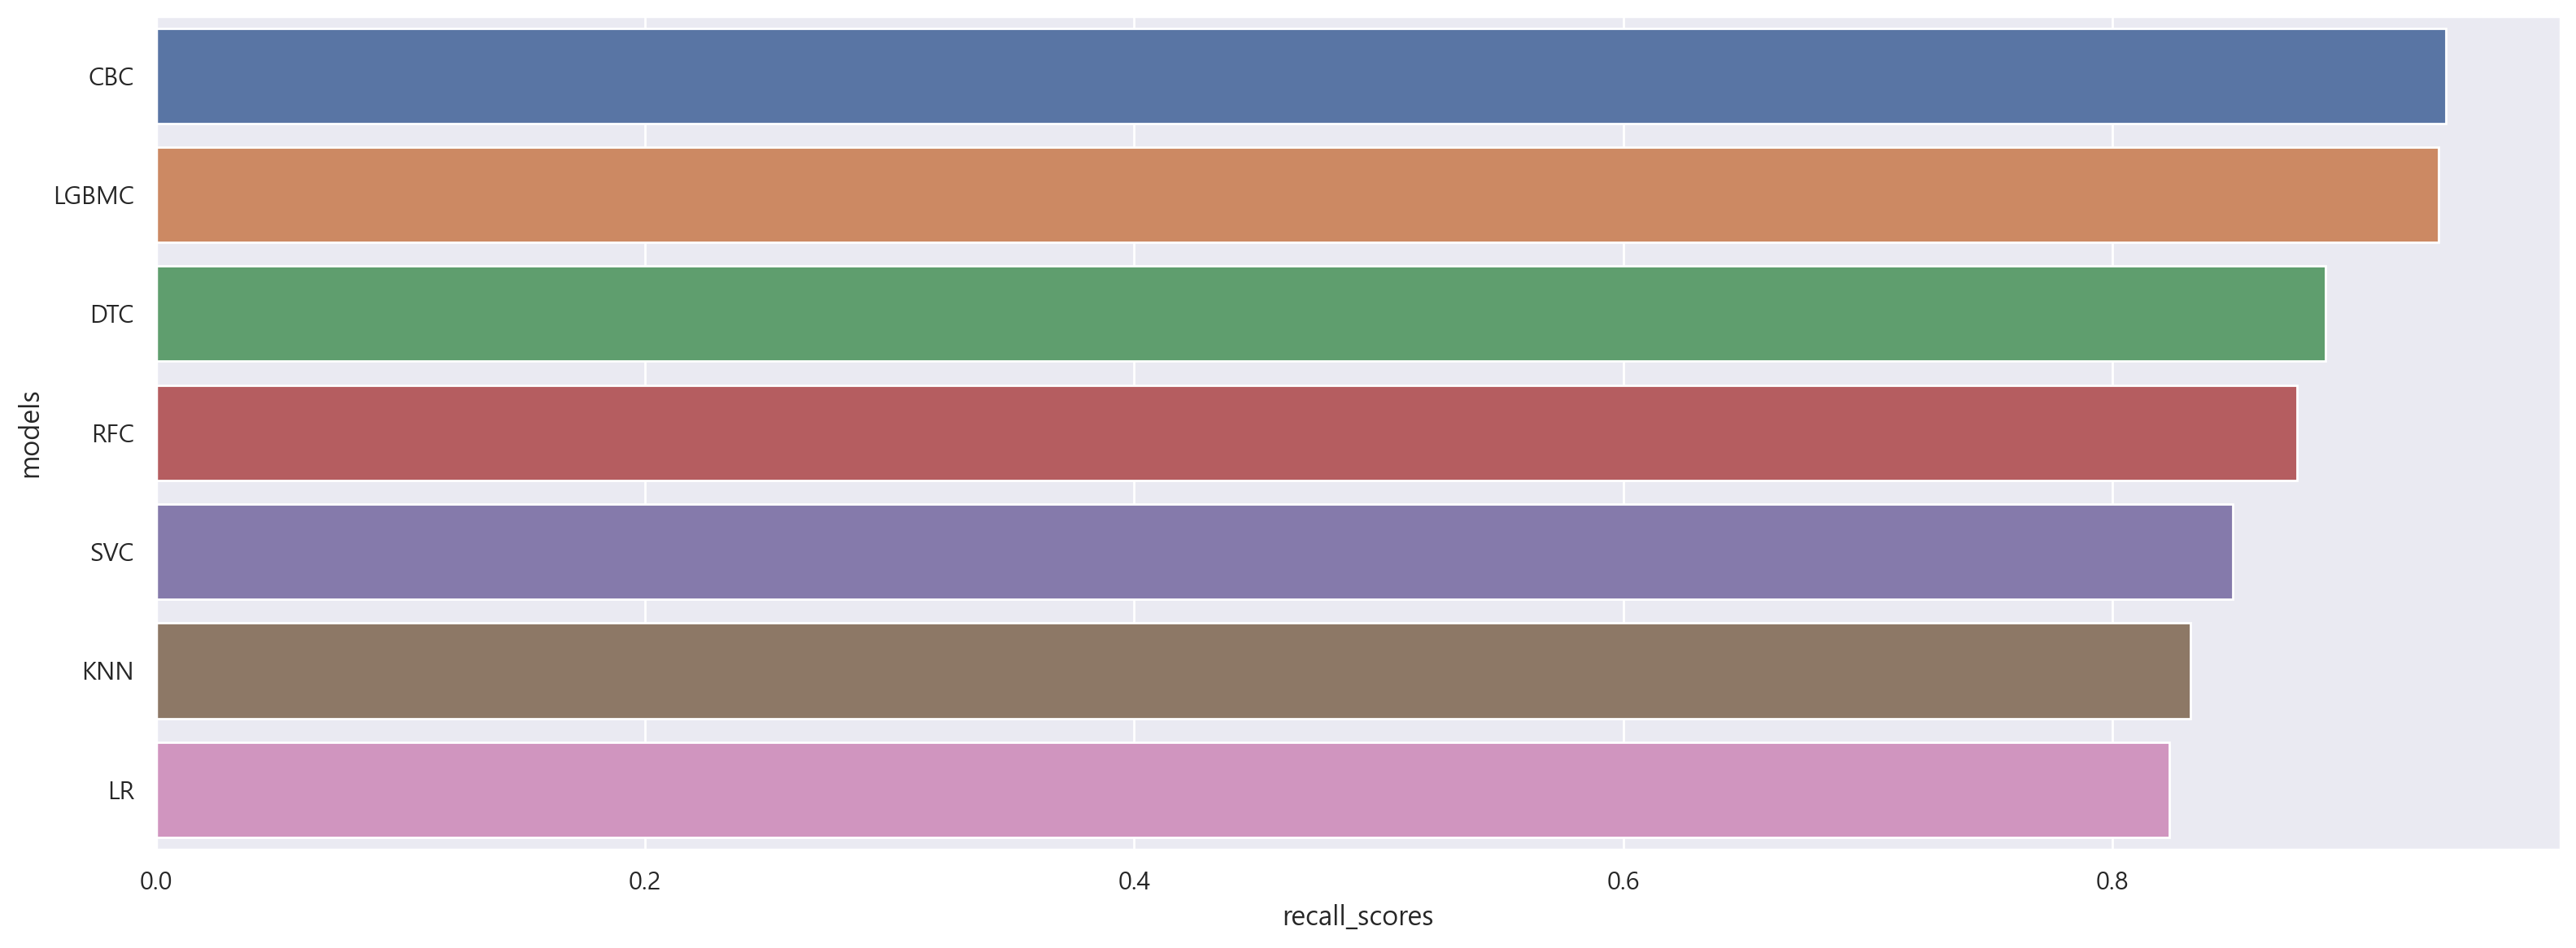

In [81]:
tmp = pd.DataFrame({'recall_scores': recall_results.values(), 'models': list(recall_results)}).sort_values('recall_scores', ascending=False)

plt.figure(figsize=(16, 6))
sns.barplot(x='recall_scores', y='models', data = tmp)
plt.tight_layout()
plt.show()

#### 모델별 학습성능, 평가성능 출력

In [74]:
print('모델 : 학습성능 / 평가성능 (Accuracy)')
for key in results:
    print(f'{key:5} : {round(results[key].score(x_train, y_train), 4):6} / {round(results[key].score(x_test, y_test), 4):6}\n')

모델 : 학습성능 / 평가성능 (Accuracy)
LR    : 0.8599 / 0.8439

KNN   : 0.9114 /  0.847

DTC   : 0.9269 / 0.8949

SVC   :  0.892 / 0.8655

RFC   : 0.9392 / 0.9073

LGBMC : 0.9857 / 0.9428

CBC   : 0.9876 / 0.9459



# Cross Validation

#### KFold 회귀

In [ ]:
models =    {
            'RL': RL(n_jobs=-1),
            'KNNR': KNNR(n_neighbors=5),
            'DTR': DTR(max_depth=5, random_state=1),
            'SVR': SVR(kernel='rbf', C=1),
            'RFR': RFR(max_depth=5, random_state=1),
            'XGBR': XGBR(max_depth=5, num_leaves=31, learning_rate=0.1),
            'LGBMR': LGBMR(max_depth=5, num_leaves=31, learning_rate=0.1),
            'CBR': CBR(iterations=100, cat_features=np.where(x_train.dtypes != np.float)[0], random_state=1),
            }

results = {}

for key in models:
    cv_score = cross_val_score(
                                models[key], 
                                x_train, 
                                y_train, 
                                cv=KFold(n_splits=5)
                                ) 

    print('=' * 20, key, '=' * 20)
    print(cv_score)
    print('평균:', cv_score.mean())
    print('표준편차:', cv_score.std())
    
    results[key] = cv_score.mean()

In [ ]:
# 시각화
plt.figure(figsize=(5, 5))
plt.barh(y=list(results), width=results.values())
plt.xlabel('Score')
plt.ylabel('Model')
plt.show()

#### SatisfiedFold 분류

In [ ]:
models =    {
            # 'LR': LR(C=1, random_state=1, n_jobs=-1),
            # 'KNN': KNNC(n_neighbors=5),
            # 'DT': DTC(max_depth=5, random_state=1),
            # 'SVC': SVC(kernel='rbf', C=1, random_state=1),
            'RFC': RFC(max_depth=5, random_state=1, n_jobs=-1),
            'XGBC': XGBC(max_depth=5, learning_rate=0.1),
            'LGBMC': LGBMC(max_depth=5, num_leaves=31, learning_rate=0.1),
            'CBC': CBC(iterations=100, cat_features=np.where(x_train.dtypes != np.float)[0], random_state=1, verbose=False),
            }

results = {}

for key in models:
    cv_score = cross_val_score(
                                models[key], 
                                x_train, 
                                y_train, 
                                cv=StratifiedKFold(n_splits=5),
                                verbose=False
                                ) 

    print('=' * 20, key, '=' * 20)
    print(cv_score)
    print('평균:', cv_score.mean())
    print('표준편차:', cv_score.std())
    
    results[key] = cv_score.mean()

In [ ]:
# 시각화
plt.figure(figsize=(16, 6))
plt.barh(y=list(results), width=results.values())
plt.xlabel('Score')
plt.ylabel('Model')
plt.show()